In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager
from collections import Counter
import seaborn as sns

In [2]:
# font_set = {f.name for f in font_manager.fontManager.ttflist}
# for f in font_set:
#     print(f)
plt.rcParams['font.sans-serif'] = ['Noto Sans TC']

## Storyline
這份問卷為使用者使用軟體後的經驗調查，目的在瞭解使中者對本軟體進行更新的反饋及對品質的滿意度
<!-- 2. 使用時間 >4 的使用者有 ____% 在持續使用本公司推出的產品上有 >4 的分數
3. 接受調查的使用者中，對軟體更新的滿意度平均為 ____、對服務後的滿意度平均為 ____、對軟體的收費與品質的滿意度平均為 ____
4.  -->

In [3]:
variable = pd.read_csv('statistic_variable.csv', encoding='utf-8', header=None)
variable

,0,1
0,No,問卷編號
1,Company,公司別
2,sex,性別
3,age,年齡
4,Area,地區
5,marriage,婚姻
6,Use_time,使用時間 (月)
7,Update,定期更新
8,Q1,我覺得更新的步驟很方便
9,Q2,我在等待更新的時間很短


In [4]:
data = pd.read_csv('statistic_data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,101,1,2,2,1,1,5,0,2,4,4,4,4,4,4,2,1,3.67
1,102,1,1,3,1,2,4,1,2,2,4,4,4,5,3,3,1,3.50
2,103,1,2,1,1,1,5,0,2,5,4,5,4,4,4,1,1,4.00
3,104,1,2,3,1,2,1,1,3,3,1,1,2,3,2,3,1,2.17
4,105,1,1,2,1,1,2,0,3,3,5,5,5,4,4,2,1,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,805,2,2,2,1,1,1,0,1,3,3,4,4,4,3,2,1,3.17
218,806,2,1,2,1,1,4,1,2,2,4,4,4,4,4,2,1,3.33
219,807,2,2,2,1,1,3,0,3,3,3,4,5,4,3,2,1,3.67
220,808,2,1,1,1,1,6,1,1,3,4,5,4,4,4,1,1,3.50


In [5]:
data.rename(columns=variable[0], inplace=True)
df = pd.DataFrame(data)
df

,No,Company,sex,age,Area,marriage,Use_time,Update,Q1,Q2,Q3,Q4,Q5,Q6,Loyalty,AGE1,AREA1,平均滿意度
0,101,1,2,2,1,1,5,0,2,4,4,4,4,4,4,2,1,3.67
1,102,1,1,3,1,2,4,1,2,2,4,4,4,5,3,3,1,3.50
2,103,1,2,1,1,1,5,0,2,5,4,5,4,4,4,1,1,4.00
3,104,1,2,3,1,2,1,1,3,3,1,1,2,3,2,3,1,2.17
4,105,1,1,2,1,1,2,0,3,3,5,5,5,4,4,2,1,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,805,2,2,2,1,1,1,0,1,3,3,4,4,4,3,2,1,3.17
218,806,2,1,2,1,1,4,1,2,2,4,4,4,4,4,2,1,3.33
219,807,2,2,2,1,1,3,0,3,3,3,4,5,4,3,2,1,3.67
220,808,2,1,1,1,1,6,1,1,3,4,5,4,4,4,1,1,3.50


In [6]:
df.describe()


,No,Company,sex,age,Area,marriage,Use_time,Update,Q1,Q2,Q3,Q4,Q5,Q6,Loyalty,AGE1,AREA1,平均滿意度
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,366.527027,1.454955,1.536036,2.369369,2.153153,1.351351,9.256757,0.567568,2.527027,3.036036,3.959459,3.932432,4.099099,4.189189,3.842342,2.157658,2.049550,3.624234
std,210.909122,0.499092,0.499827,1.088217,0.985857,0.478471,6.673499,0.496533,0.843763,0.941049,0.654380,0.672627,0.651555,0.773000,0.722871,0.729104,0.825101,0.417062
min,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.670000
25%,156.250000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,0.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,1.000000,3.330000
50%,250.500000,1.000000,2.000000,2.000000,2.000000,1.000000,7.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.670000
75%,531.750000,2.000000,2.000000,3.000000,3.000000,2.000000,13.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.830000
max,809.000000,2.000000,2.000000,5.000000,4.000000,2.000000,30.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000


In [7]:
df.mean()

No          366.527027
Company       1.454955
sex           1.536036
age           2.369369
Area          2.153153
marriage      1.351351
Use_time      9.256757
Update        0.567568
Q1            2.527027
Q2            3.036036
Q3            3.959459
Q4            3.932432
Q5            4.099099
Q6            4.189189
Loyalty       3.842342
AGE1          2.157658
AREA1         2.049550
平均滿意度         3.624234
dtype: float64

In [8]:
df.median()

No          250.50
Company       1.00
sex           2.00
age           2.00
Area          2.00
marriage      1.00
Use_time      7.00
Update        1.00
Q1            3.00
Q2            3.00
Q3            4.00
Q4            4.00
Q5            4.00
Q6            4.00
Loyalty       4.00
AGE1          2.00
AREA1         2.00
平均滿意度         3.67
dtype: float64

In [9]:
df1 = df.iloc[:, 1:19]
df1.corr()

,Company,sex,age,Area,marriage,Use_time,Update,Q1,Q2,Q3,Q4,Q5,Q6,Loyalty,AGE1,AREA1,平均滿意度
Company,1.000000,-0.056949,-0.077533,0.381937,-0.047115,0.005526,-0.060699,-0.195878,0.090179,-0.164946,0.091984,-0.153188,-0.341398,-0.151464,-0.086091,0.428484,-0.196246
sex,-0.056949,1.000000,0.017013,-0.038799,-0.034261,0.006031,-0.082784,-0.082789,0.035707,-0.057768,-0.093668,-0.066593,-0.076282,-0.103178,0.027797,-0.009835,-0.095809
age,-0.077533,0.017013,1.000000,0.128394,0.679490,-0.004395,0.087590,0.067927,-0.052824,-0.067836,-0.021386,-0.058241,-0.164136,-0.052184,0.895781,0.105511,-0.086312
Area,0.381937,-0.038799,0.128394,1.000000,0.106038,0.122608,-0.104429,-0.086594,0.111080,-0.067486,0.118031,-0.002602,-0.121321,-0.016760,0.085863,0.958541,-0.011929
marriage,-0.047115,-0.034261,0.679490,0.106038,1.000000,-0.056722,0.109128,0.166910,-0.008148,-0.012108,-0.024320,-0.097678,-0.009258,-0.074606,0.722501,0.081780,0.015186
Use_time,0.005526,0.006031,-0.004395,0.122608,-0.056722,1.000000,-0.005942,-0.056284,-0.062724,-0.113655,-0.073737,-0.012122,0.087028,-0.045036,-0.050205,0.139022,-0.068170
Update,-0.060699,-0.082784,0.087590,-0.104429,0.109128,-0.005942,1.000000,0.092825,-0.198911,-0.095977,-0.087881,-0.118696,-0.139557,-0.001704,0.076682,-0.068954,-0.166577
Q1,-0.195878,-0.082789,0.067927,-0.086594,0.166910,-0.056284,0.092825,1.000000,-0.063918,-0.034885,-0.072510,0.052721,0.006000,-0.041204,0.121759,-0.148171,0.300046
Q2,0.090179,0.035707,-0.052824,0.111080,-0.008148,-0.062724,-0.198911,-0.063918,1.000000,0.090558,0.125390,0.134365,0.034128,0.054952,-0.094051,0.073449,0.457776
Q3,-0.164946,-0.057768,-0.067836,-0.067486,-0.012108,-0.113655,-0.095977,-0.034885,0.090558,1.000000,0.374117,0.508263,0.471445,0.761249,-0.005511,-0.113590,0.661831


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text major ticklabel objects>)

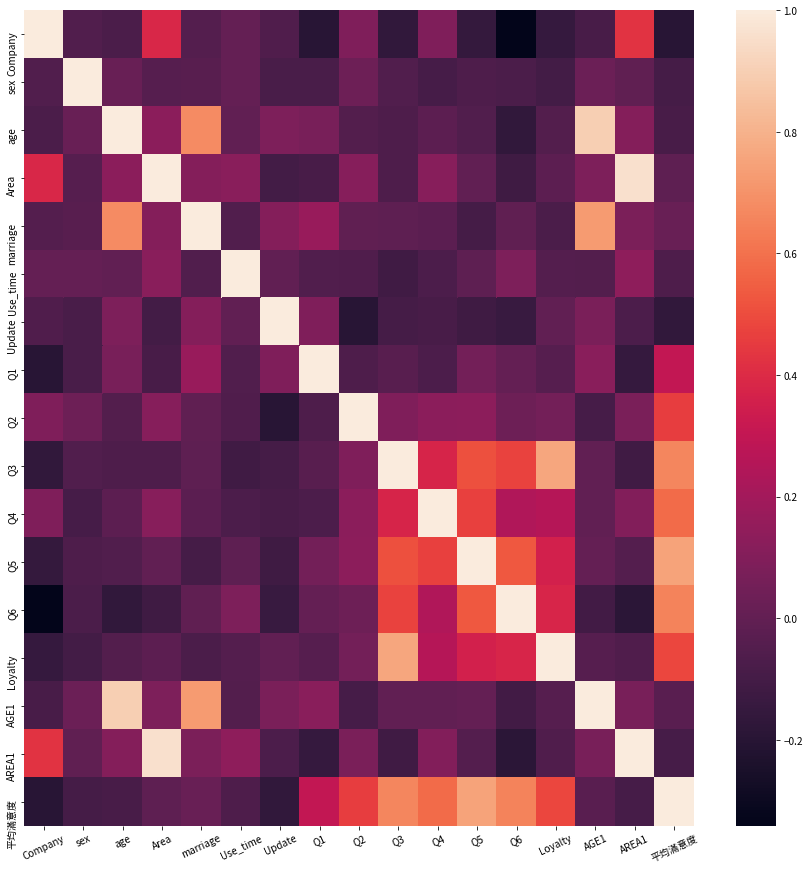

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr())
plt.xticks(rotation=25)

In [11]:
target_feature = df1.corr()['平均滿意度']
relative_feature = target_feature[target_feature>=0.5]
print(relative_feature)

Q3       0.661831
Q4       0.585896
Q5       0.750935
Q6       0.649874
平均滿意度    1.000000
Name: 平均滿意度, dtype: float64


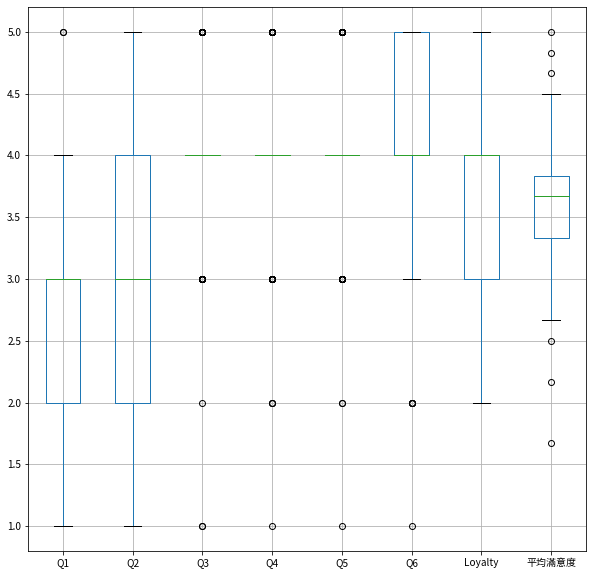

In [12]:
df.boxplot(column=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Loyalty', '平均滿意度'], figsize=(10, 10))

In [13]:
count_q1 = Counter(df['Q1'])
count_q2 = Counter(df['Q2'])
count_q3 = Counter(df['Q3'])
count_q4 = Counter(df['Q4'])
count_q5 = Counter(df['Q5'])
count_q6 = Counter(df['Q6'])
count_loyalty = Counter(df['Loyalty'])
df2 = pd.DataFrame({
    'Q1_count': count_q1,
    'Q2_count': count_q2,
    'Q3_count': count_q3,
    'Q4_count': count_q4,
    'Q5_count': count_q5,
    'Q6_count': count_q6,
    'Loyalty_count': count_loyalty,
})
df2 = df2.fillna(0).astype(int).sort_index()
df2

,Q1_count,Q2_count,Q3_count,Q4_count,Q5_count,Q6_count,Loyalty_count
1,29,11,2,1,1,1,0
2,67,49,1,3,2,5,8
3,108,95,37,43,25,28,54
4,16,55,146,138,140,105,125
5,2,12,36,37,54,83,35


In [14]:
# q1 = pd.Series(np.unique(df['Q1'], return_counts=True)[1])
# q2 = pd.Series(np.unique(df['Q2'], return_counts=True)[1])
# q3 = pd.Series(np.unique(df['Q3'], return_counts=True)[1])
# q4 = pd.Series(np.unique(df['Q4'], return_counts=True)[1])
# q5 = pd.Series(np.unique(df['Q5'], return_counts=True)[1])
# q6 = pd.Series(np.unique(df['Q6'], return_counts=True)[1])
# loyalty = pd.Series(np.unique(df['Loyalty'], return_counts=True)[1])
# df2 = pd.DataFrame({'Q1_count': q1, 'Q2_count': q2, 'Q3_count': q3,
#                    'Q4_count': q4, 'Q5_count': q5, 'Q6_count': q6, 'Loyalty_count': loyalty})
# print(df2)

# questionnaire = df.iloc[:, 8:15]
# questionnaire


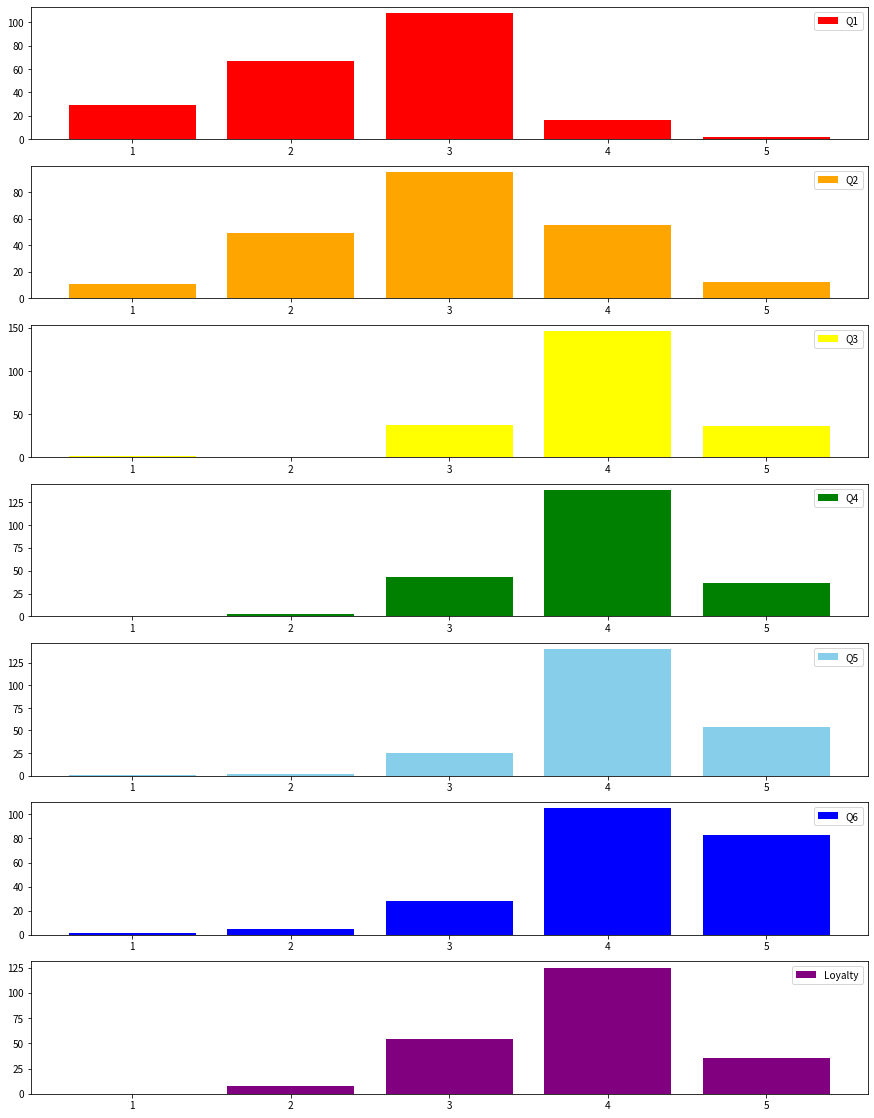

In [15]:
fig, ax = plt.subplots(7, 1, figsize=(15, 20))
ax[0].bar(df2.index, df2.Q1_count, color='red')
ax[0].legend(['Q1'])
ax[1].bar(df2.index, df2.Q2_count, color='orange')
ax[1].legend(['Q2'])
ax[2].bar(df2.index, df2.Q3_count, color='yellow')
ax[2].legend(['Q3'])
ax[3].bar(df2.index, df2.Q4_count, color='green')
ax[3].legend(['Q4'])
ax[4].bar(df2.index, df2.Q5_count, color='skyblue')
ax[4].legend(['Q5'])
ax[5].bar(df2.index, df2.Q6_count, color='blue')
ax[5].legend(['Q6'])
ax[6].bar(df2.index, df2.Loyalty_count, color='purple')
ax[6].legend(['Loyalty'])

plt.show()

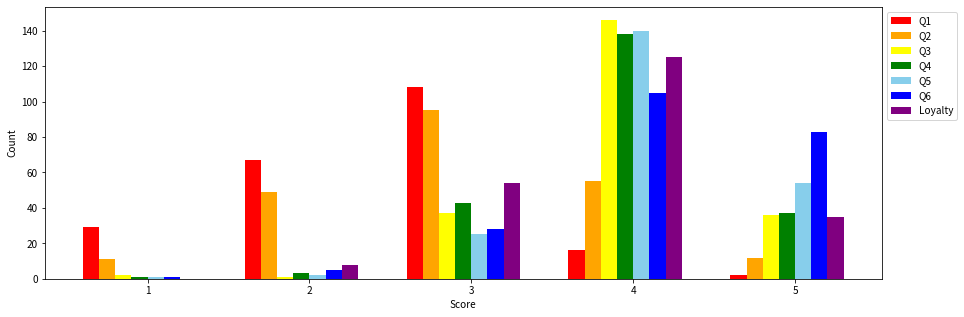

In [16]:
# sns.barplot(x=df2.index, y=df2.Q1_count, data=df2, color='red')
# sns.barplot(x=df2.index, y=df2.Q2_count, data=df2, color='orange')
# sns.barplot(x=df2.index, y=df2.Q3_count, data=df2, color='yellow')
# sns.barplot(x=df2.index, y=df2.Q4_count, data=df2, color='green')
# sns.barplot(x=df2.index, y=df2.Q5_count, data=df2, color='skyblue')
# sns.barplot(x=df2.index, y=df2.Q6_count, data=df2, color='blue')
# sns.barplot(x=df2.index, y=df2.Loyalty_count, data=df2, color='purple')
width = 0.1
plt.figure(figsize=(15, 5))
plt.bar(df2.index, df2.Q1_count, width, color='red', label='Q1')
plt.bar(df2.index+width, df2.Q2_count, width, color='orange', label='Q2')
plt.bar(df2.index+width*2, df2.Q3_count, width, color='yellow', label='Q3')
plt.bar(df2.index+width*3, df2.Q4_count, width, color='green', label='Q4')
plt.bar(df2.index+width*4, df2.Q5_count, width, color='skyblue', label='Q5')
plt.bar(df2.index+width*5, df2.Q6_count, width, color='blue', label='Q6')
plt.bar(df2.index+width*6, df2.Loyalty_count, width, color='purple', label='Loyalty')
plt.xticks(df2.index+width*3.5, df2.index)
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()


In [17]:
target_feature = df1.corr()['Loyalty']
relative_feature = target_feature[target_feature >= 0.5]
print(relative_feature)

Q3         0.761249
Loyalty    1.000000
Name: Loyalty, dtype: float64


### Dipersion

In [18]:
# Range
max(df['平均滿意度']) - min(df['平均滿意度'])

# Quantiles
five_num = [df['平均滿意度'].quantile(0),
            df['平均滿意度'].quantile(0.25),
            df['平均滿意度'].quantile(0.5),
            df['平均滿意度'].quantile(0.75),
            df['平均滿意度'].quantile(1)]

In [19]:
skew_q3 = df['Q3'].skew()
skew_satis = df['Loyalty'].skew()
print(skew_q3)
print(skew_satis)

-0.8387811151244474
-0.33254361348310435


# Hypothesis
- 使用者對 Q3 的回答與忠誠度分佈是否有顯著差異
  1. H0 = 使用者對 Q3 的回答與忠誠度分佈沒有顯著差異
  2. H1 = 使用者對 Q3 的回答與忠誠度分佈有顯著差異
  3. Confidence level = 95%
  4. Test statistic = 2.66665476697807
  5. Analysis result = p-value >= 0.05，不拒絕 null hypothesis, 因此推論 Q3 與 忠誠度分佈沒有顯著差異

/Users/niomoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/niomoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


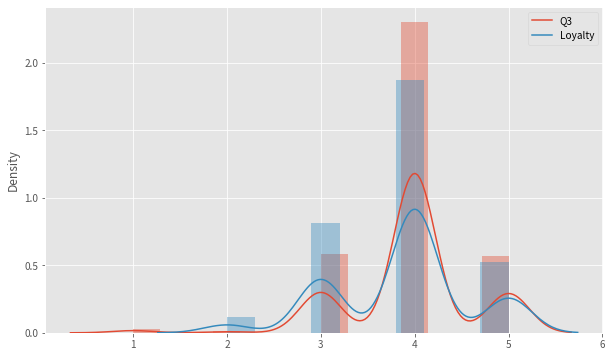

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
# sns.distplot(df2['Q1_count'])
# sns.distplot(df2['Q2_count'])
sns.distplot(df['Q3'])
# sns.distplot(df2['Q4_count'])
# sns.distplot(df2['Q5_count'])
# sns.distplot(df2['Q6_count'])
sns.distplot(df['Loyalty'])
# plt.legend(labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Loyalty'])
plt.legend(labels=['Q3', 'Loyalty'])
plt.xlabel('')
plt.show()


In [21]:
observed = df['Q3']
ratio = df['Loyalty'] / 222
expected = ratio * 222
chi_squared_stat = (((observed - expected)**2) / expected).sum()
print(chi_squared_stat)

20.383333333333333


In [22]:
crit = stats.chi2.ppf(q=0.95, df=221)
print('Critical value', crit)

p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df=221)
print('p-value', p_value)

Critical value 256.6802295416027
p-value 1.0


In [23]:
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=20.383333333333333, pvalue=1.0)

# Hypothesis
- 使用者的使用時間與忠誠度是否顯著差異
  1. H0 = 使用者的忠誠度與平均滿意度的平均沒有顯著差異
  2. H1 = 使用者的忠誠度與平均滿意度的平均有顯著差異
  3. Confidence level = 95%
  4. Test statistic = 4.495596456805044
  5. Analysis result = p-value < 0.05，拒絕 null hypothesis，使用者的使用時間與平均滿意度的平均有顯著差異

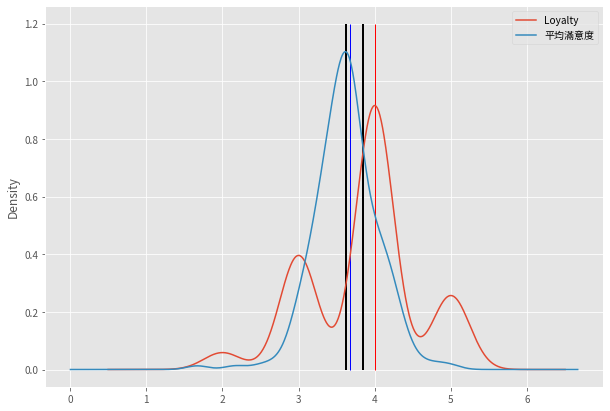

In [24]:
df['Loyalty'].plot(kind='density', figsize=(10, 7))
plt.vlines(df['Loyalty'].mean(), ymin=0, ymax=1.2, linewidth=2.0)
plt.vlines(df['Loyalty'].median(), ymin=0, ymax=1.2, linewidth=1.0, color='red')
df['平均滿意度'].plot(kind='density')
plt.vlines(df['平均滿意度'].mean(), ymin=0, ymax=1.2, linewidth=2.0)
plt.vlines(df['平均滿意度'].median(), ymin=0, ymax=1.2, linewidth=1.0, color='blue')
plt.legend()
plt.show()

In [25]:
stats.ttest_1samp(a=df['Loyalty'], popmean=df['平均滿意度'].mean())

Ttest_1sampResult(statistic=4.495596456805044, pvalue=1.1196264376452014e-05)

In [26]:
down = stats.t.ppf(q=0.025, df=221)
up = stats.t.ppf(q=0.975, df=221)
print(down, up)

-1.970756270488079 1.9707562704880786


In [27]:
stats.t.cdf(x=4.495596456805044, df=221) * 2


1.9999888037356235

In [28]:
sigma = df['Loyalty'].std()/math.sqrt(222)
stats.t.interval(alpha=0.95, df=221, loc=df['Loyalty'].mean(), scale=sigma)

(3.7467292405374204, 3.9379554441472644)

# Hypothesis
- 使用者每題的回答是否獨立
  1. H0 = 使用者對問題的回答獨立
  2. H1 = 使用者對問題的回答相依
  3. Confidence level = 95%
  4. Test statistic = 36.41502850180731
  5. Analysis result = p-value >= 0.05，不能拒絕 null hypothesis，使用者對問題的回答獨立

In [90]:
# df3 = df1.iloc[:,7:14].transpose()
df3 = df2.transpose()
# df3 = df2.copy()
col_total = df3.sum()
df3.loc['col_total', :] = col_total
row_total = df3.sum(axis='columns')
df3.loc[:, 'row_total'] = row_total
df3 = df3.astype(int)
print(df3)

                1    2    3    4    5  row_total
Q1_count       29   67  108   16    2        222
Q2_count       11   49   95   55   12        222
Q3_count        2    1   37  146   36        222
Q4_count        1    3   43  138   37        222
Q5_count        1    2   25  140   54        222
Q6_count        1    5   28  105   83        222
Loyalty_count   0    8   54  125   35        222
col_total      45  135  390  725  259       1554


In [91]:
observed = df3.iloc[0:7, 0:5]
expected = np.outer(df3['row_total'][0:7], df3.loc['col_total'][0:5]) / 1554
# observed = df3.iloc[0:5, 0:7]
# expected = np.outer(df3['row_total'][0:5], df3.loc['col_total'][0:7]) / 1554

expected = pd.DataFrame(expected)
expected.columns = ['1', '2', '3', '4', '5']
expected.index = ['Q1_ count', 'Q2_ count', 'Q3_ count', 'Q4_count', 'Q5_count', 'Q6_count', 'Loyalty_count']
# expected.index = ['1', '2', '3', '4', '5']
# expected.columns = ['Q1_ count', 'Q2_ count', 'Q3_ count', 'Q4_count', 'Q5_count', 'Q6_count', 'Loyalty_count']
expected


,1,2,3,4,5
Q1_ count,6.428571,19.285714,55.714286,103.571429,37.0
Q2_ count,6.428571,19.285714,55.714286,103.571429,37.0
Q3_ count,6.428571,19.285714,55.714286,103.571429,37.0
Q4_count,6.428571,19.285714,55.714286,103.571429,37.0
Q5_count,6.428571,19.285714,55.714286,103.571429,37.0
Q6_count,6.428571,19.285714,55.714286,103.571429,37.0
Loyalty_count,6.428571,19.285714,55.714286,103.571429,37.0


In [92]:
chi_squared_stat = (((observed - expected)**2)/expected).sum().sum()
print(chi_squared_stat)

0.0


In [93]:
crit = stats.chi2.ppf(q=0.95, df=1320)
print('Critical value', crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1320)
print('p-value', p_value)

Critical value 1405.6357716292828
p-value 1.0


In [94]:
stats.chi2_contingency(observed=observed)

(708.1097770449495,
 4.877565234224982e-134,
 24,
 array([[  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ],
        [  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ],
        [  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ],
        [  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ],
        [  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ],
        [  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ],
        [  6.42857143,  19.28571429,  55.71428571, 103.57142857,
          37.        ]]))

# Hypothesis
- 使用者的性別對平均滿意度是否存在顯著差異
  1. H0 = 使用者的性別對平均滿意度不存在顯著差異
  2. H1 = 使用者的性別對平均滿意度存在顯著差異
  3. Confidence level = 95%
  4. Test statistic = 2.038185250270086
  5. Analysis result = p-value >= 0.05，不能拒絕 null hypothesis，使用者的性別對平均滿意度不存在顯著差異

In [100]:
frame = pd.DataFrame({'sex': df['sex'], 'satis': df['平均滿意度']})
groups = frame.groupby('sex').groups

sex1 = df['平均滿意度'][groups[1]]
sex2 = df['平均滿意度'][groups[2]]

stats.f_oneway(sex1, sex2)

F_onewayResult(statistic=2.038185250270086, pvalue=0.15481046284639413)

# Hypothesis
- 使用者是否定期更新對平均滿意度是否存在顯著差異
  1. H0 = 使用者是否定期更新對平均滿意度不存在顯著差異
  2. H1 = 使用者是否定期更新對平均滿意度存在顯著差異
  3. Confidence level = 95%
  4. Test statistic = 6.278742324415115
  5. Analysis result = p-value < 0.05，拒絕 null hypothesis，使用者是否定期更新對平均滿意度存在顯著差異

In [102]:
frame = pd.DataFrame({'update': df['Update'], 'satis': df['平均滿意度']})
groups = frame.groupby('update').groups

no = df['平均滿意度'][groups[0]]
yes = df['平均滿意度'][groups[1]]

stats.f_oneway(no, yes)


F_onewayResult(statistic=6.278742324415115, pvalue=0.01294366345448478)

# Hypothesis
- 使用者是否定期更新對平均滿意度是否存在顯著差異
  1. H0 = 使用者是否定期更新對平均滿意度不存在顯著差異
  2. H1 = 使用者是否定期更新對平均滿意度存在顯著差異
  3. Confidence level = 95%
  4. Test statistic = 6.278742324415115
  5. Analysis result = p-value < 0.05，拒絕 null hypothesis，使用者是否定期更新對平均滿意度存在顯著差異

In [111]:
frame = pd.DataFrame({'Q1': df['Q1'], 'satis': df['平均滿意度']})
groups = frame.groupby('Q1').groups
Q1_pair = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]

for pair1, pair2 in Q1_pair:
    print(pair1, pair2)
    print(stats.ttest_ind(groups[pair1], groups[pair2]))


1 2
Ttest_indResult(statistic=2.9187848811248474, pvalue=0.0043969606562147545)
1 3
Ttest_indResult(statistic=3.5768115675846763, pvalue=0.0004834874975505985)
1 4
Ttest_indResult(statistic=4.7989250422514935, pvalue=1.9501799876710303e-05)
1 5
Ttest_indResult(statistic=0.8975161891892982, pvalue=0.3768346387246989)
2 3
Ttest_indResult(statistic=0.665124484084458, pvalue=0.5068565940877252)
2 4
Ttest_indResult(statistic=2.1451398031409084, pvalue=0.03493704585925976)
2 5
Ttest_indResult(statistic=-0.12627861716830321, pvalue=0.8998895702430505)
3 4
Ttest_indResult(statistic=1.8091189220170696, pvalue=0.0728949288064706)
3 5
Ttest_indResult(statistic=-0.2731106086026125, pvalue=0.7852897505617298)
4 5
Ttest_indResult(statistic=-1.2066833288334833, pvalue=0.2450930109974522)


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.2367,0.0559,-0.0037,0.4771,False
1,3,0.2735,0.009,0.0473,0.4997,True
1,4,0.4809,0.0011,0.1442,0.8177,True
1,5,1.2916,0.001,0.501,2.0822,True
2,3,0.0368,0.9,-0.1314,0.205,False
2,4,0.2442,0.1718,-0.0567,0.5451,False
2,5,1.0549,0.0022,0.2789,1.8309,True
3,4,0.2074,0.2844,-0.0823,0.4971,False
3,5,1.0181,0.0032,0.2463,1.7898,True
4,5,0.8106,0.0502,-0.0004,1.6217,False


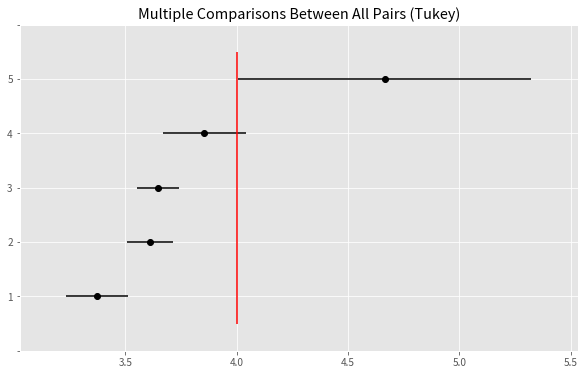

In [114]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=frame['satis'], groups=frame['Q1'], alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x=4, ymin=-0.5, ymax=4.5, color='red')

tukey.summary()